## Testes de Hipóteses

In [1]:
import pandas as pd
import numpy as np

dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


O valor de p é: 0.0


True

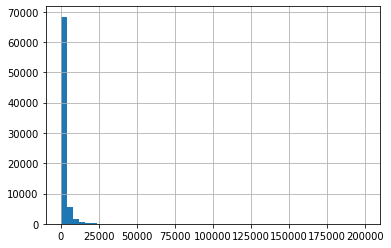

In [2]:
# Teste da variável Renda

from scipy.stats import normaltest
significancia = 0.05
dados.Renda.hist(bins = 50)
stat_test, p_valor = normaltest(dados.Renda)
print("O valor de p é:", p_valor)
p_valor <= significancia

O valor de p é: 0.9049591541967501


False

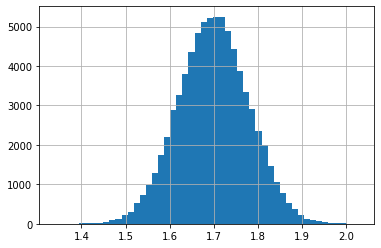

In [3]:
# Teste da variável Altura

from scipy.stats import normaltest
dados.Altura.hist(bins = 50)
stat_test, p_valor = normaltest(dados.Altura)
print("O valor de p é:", p_valor)
p_valor <= significancia

## Teste Bicaudal

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

In [4]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

amostra = pd.DataFrame(amostra, columns=['Amostra'])
media_amostra = amostra.mean()[0]
desvio_padrao_amostra = amostra.std()[0]

media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

print("Média da Amostra:", media_amostra)
print("Desvio Padrão:", desvio_padrao_amostra)

Média da Amostra: 503.24
Desvio Padrão: 4.48380305052735


In [5]:
from scipy.stats import norm

probabilidade = (0.5 + (confianca / 2))
print("Probabilidade:", probabilidade)
#Área de aceitação de H0

z_alpha_2 = norm.ppf(probabilidade)
print("z alpha/2:", z_alpha_2)
#Área de rejeição de H0

z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
print("z:", z)
#Área fora dos 95%


Probabilidade: 0.975
z alpha/2: 1.959963984540054
z: 5.109559775991873


In [6]:
# Rejeitar H0 se z <= z alpha/2 ou se z >= z alpha/2
z <= -z_alpha_2, z >= z_alpha_2

(False, True)

In [7]:
# Critério do p-valor, rejeitar H0 se p <= alpha
p_valor = 2 * (1 - norm.cdf(z))
p_valor = 2 * (norm.sf(z))
p_valor <= significancia

True

<font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

## Teste Unicaudal

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

In [8]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

In [9]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1

amostra = pd.DataFrame(amostra, columns=['Amostra'])
media_amostra = amostra.mean()[0]
desvio_padrao_amostra = amostra.std()[0]

print("Média da Amostra:", media_amostra)
print("Desvio Padrão:", desvio_padrao_amostra)

Média da Amostra: 36.2504
Desvio Padrão: 0.9667535018469455


In [10]:
from scipy.stats import t as t_student
tabela_t_student[22:25]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 23  1.978249  2.068658  2.176958  2.313231   
                           24  1.973994  2.063899  2.171545  2.306913   
                           25  1.970095  2.059539  2.166587   2.30113   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 23  2.499867  2.807336  
                           24  2.492159   2.79694  
                           25  2.485107  2.787436

In [11]:
#Obtendo T/alpha
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

In [12]:
#Obtendo T
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

-3.876893119952081

In [13]:
#Rejeitar H0 se t >= t/alpa
t >= t_alpha

False

In [14]:
# Critério do p-valor, rejeitar H0 se p <= alpha
t
p_valor = t_student.sf(t, df = 24)
p_valor <= significancia

False

<font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

## Teste para duas amostras

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

In [15]:
homens = dados.query('Sexo == 0').sample(n = 500, random_state = 101).Renda
mulheres = dados.query('Sexo == 1').sample(n = 500, random_state = 101).Renda

media_amostra_M = mulheres.mean()
media_amostra_H = homens.mean()

desvio_padrao_amostra_M = mulheres.std()
desvio_padrao_amostra_H = homens.std()

significancia = 0.01
confianca = 1 - significancia
n_M = 500
n_H = 500
D_0 = 0

print(desvio_padrao_amostra_M)
print(desvio_padrao_amostra_H)

1569.901190748458
2548.0508024998717


In [16]:
probabilidade = confianca
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

2.33

In [17]:
numerador = (media_amostra_H - media_amostra_M) - D_0
denominador = np.sqrt((desvio_padrao_amostra_H ** 2 / n_H) + (desvio_padrao_amostra_M ** 2 / n_M))
z = numerador / denominador
z

5.8656200577647555

In [18]:
#Rejeitar H0 se z >= z/alpha
z >= z_alpha

True

In [19]:
# Critério do p-valor, rejeitar H0 se p <= alpha

from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
test_H = DescrStatsW(homens)
test_M = DescrStatsW(mulheres)

test_A = test_H.get_compare(test_M)
z, p_valor = test_A.ztest_ind(alternative='larger', value=0)

test_B = CompareMeans(test_H, test_M)
z, p_valor = test_B.ztest_ind(alternative='larger', value=0)

p_valor <= significancia

True

## Testes Wilcoxon

Empregado quando se deseja comparar duas amostras relacionadas, amostras emparelhadas. Pode ser aplicado quando se deseja testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas.

Um novo tratamento para acabar com o hábito de fumar está sendo empregado em um grupo de **35 pacientes** voluntários. De cada paciente testado foram obtidas as informações de quantidades de cigarros consumidos por dia antes e depois do término do tratamento. Assumindo um **nível de confiança de 95%** é possível concluir que, depois da aplicação do novo tratamento, houve uma mudança no hábito de fumar do grupo de pacientes testado?

In [20]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [21]:
fumo = pd.DataFrame(fumo)
media_antes = fumo.Antes.mean()
media_depois = fumo.Depois.mean()

probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)

fumo['Dif'] = fumo.Depois - fumo.Antes
fumo.head()

,Antes,Depois,Dif
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1


In [22]:
fumo['|Dif|'] = fumo.Dif.abs()
fumo.head()

,Antes,Depois,Dif,|Dif|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1


In [23]:
fumo.sort_values(by = '|Dif|', inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4


In [24]:
fumo['Posto'] = range(1, len(fumo) + 1)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5


In [25]:
posto = fumo[['|Dif|', 'Posto']].groupby(['|Dif|']).mean()
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5


In [26]:
posto.reset_index(inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5


In [27]:
fumo.drop(['Posto'], axis = 1, inplace = True)
fumo.head()

,Antes,Depois,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4


In [28]:
fumo = fumo.merge(posto, left_on='|Dif|', right_on='|Dif|', how = 'left')
fumo.head()

,Antes,Depois,Dif,|Dif|,Posto
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5


In [29]:
fumo['Posto (+)'] = fumo.apply(lambda x: x.Posto if x.Dif > 0 else 0, axis = 1)
fumo['Posto (-)'] = fumo.apply(lambda x: x.Posto if x.Dif < 0 else 0, axis = 1)
fumo.drop(['Posto'], axis = 1, inplace = True)
T = min(fumo['Posto (+)'].sum(), fumo['Posto (-)'].sum())

In [30]:
T

22.0

In [31]:
mu_T = (n * (n + 1)) / 4
mu_T

315.0

In [32]:
sigma_T = np.sqrt((n * (n + 1) * ((2 * n) + 1)) / 24)
sigma_T

61.053255441458646

In [33]:
Z = (T - mu_T) / sigma_T
Z

-4.799088891843698

In [34]:
#Rejeitar se Z <= z alpha/2 ou se Z >= z alpha/2
Z <= -z_alpha_2, Z >= z_alpha_2

(True, False)

In [35]:
# Rejeitar h0 se o valor de p <= alpha
from scipy.stats import wilcoxon

T, p_valor = wilcoxon(fumo.Antes, fumo.Depois)
print(T)
print(p_valor)

p_valor <= significancia

22.0
3.119930624961853e-08


True

<font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.</font>

## Teste de Mann-Whitney

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade **teste a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

In [36]:
mulheres = dados.query('Sexo == 1 and Renda > 0').sample(n = 8, random_state = 101).Renda
homens = dados.query('Sexo == 0 and Renda > 0').sample(n = 6, random_state = 101).Renda

media_amostra_M = mulheres.mean()
media_amostra_H = homens.mean()

significancia = 0.05
confianca = 1 - significancia
n_1 = len(homens)
n_2 = len(mulheres)

In [37]:
graus_de_liberdade = n_1 + n_2 - 2
tabela_t_student[10:13]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 11  2.096139  2.200985   2.32814  2.490664   
                           12  2.076441  2.178813  2.302722    2.4607   
                           13  2.060038  2.160369  2.281604  2.435845   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 11  2.718079  3.105807  
                           12  2.680998   3.05454  
                           13  2.650309  3.012276

In [38]:
t_alpha = t_student.ppf(significancia, graus_de_liberdade)
t_alpha.round(2)

-1.78

In [39]:
H = pd.DataFrame(homens)
H['Sexo'] = 'Homens'

M = pd.DataFrame(mulheres)
M['Sexo'] = 'Mulheres'

sexo = H.append(M)
sexo.reset_index(inplace = True, drop = True)

sexo.sort_values(by = 'Renda', inplace = True)

sexo['Posto'] = range(1, len(sexo) + 1)

posto = sexo[['Renda', 'Posto']].groupby(['Renda']).mean()

posto.reset_index(inplace = True)

sexo.drop(['Posto'], axis = 1, inplace = True)

sexo = sexo.merge(posto, left_on='Renda', right_on='Renda', how = 'left')

C:\Users\lucas\AppData\Local\Temp\ipykernel_1896\2055843629.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sexo = H.append(M)


In [40]:
Temp = sexo[['Sexo', 'Posto']].groupby('Sexo').sum()
Temp

,Posto
Sexo,
Homens,61.0
Mulheres,44.0


In [41]:
R_1 = Temp.loc['Homens'][0]
R_1

61.0

In [42]:
R_2 = Temp.loc['Mulheres'][0]
R_2

44.0

In [43]:
u_1 = n_1 * n_2 + ((n_1 * (n_1 + 1)) / (2)) - R_1
u_1

8.0

In [44]:
u_2 = n_1 * n_2 + ((n_2 * (n_2 + 1)) / (2)) - R_2
u_2

40.0

In [45]:
u = min(u_1, u_2)
u

8.0

In [46]:
mu_u = (n_1 * n_2) / 2
mu_u

24.0

In [47]:
sigma_u = np.sqrt(n_1 * n_2 * (n_1 + n_2 + 1) / 12)
sigma_u

7.745966692414834

In [48]:
Z = (u - mu_u) / sigma_u
Z.round(2)

-2.07

In [49]:
# Rejeitar H0 se Z <= -t alpha
Z <= t_alpha

True

In [50]:
# Rejeitar H0 se o valor de p <= alpha

from scipy.stats import mannwhitneyu

u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')
print(u)
print(p_valor)
p_valor <= significancia

8.0
0.022221119551528605


True

<font color='green'>Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo feminino é menor que a média das rendas dos chefes de domicílios do sexo masculino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>